In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from scipy.stats import chi2_contingency, fisher_exact
from sklearn.model_selection import train_test_split

Name: 

# Problem Set: Linear Regression (Album Sales) 

A record company is interested in predicting album sales. They provide you with data of album releases and the following variables:

**Outcome variable:**

 * Sales (CDs and downloads) in the week after release in thousands of euros (`Sales`)

**Possible predictor variables:** 
  * The amount spent promoting the album before release in thousands of euros (`Adverts`), 
  * Number of plays on the radio (`Airplay`)
  * Attractiveness of the band - based on market research (`Attract`)

**Taks description:**

**TASK 1**

 - Task 1.1: Import the data and drop the variable 'Unnamed: 0'. Furthermore, report how many observations there are in the dataset and check the level of measurement. 
  
 - Task 1.2: Check if there are any missing values in the dataset.
  
 - Task 1.3: Descriptive statistics: obtain the mean, median, mode, range and standard deviation for the variable `Sales`. Next, obtain summary statistics for all numerical columns (use `.describe()`). 
    
 - Task 1.4: Visualize the distributions of all numerical variables in a histogram and a boxplot. Comment on your findings about the distribution of the variables. In particular, what kind of distribution do you observe and are there any signs for outliers?
  
 - Task 1.5: Analyze the relationship between all variables with a scatterplot (use `.plotting.scatter_matrix`). Comment on your findings. For instance, is there an indication for a relationship between the predictors and the response variable? Does the relationship appear to be linear?
  
 - Task. 1.6: Inspect the relationship between the variables (correlation) by calculating the correlations using the default method ( "pearson"). Compute the matrix of correlations between the variables using the function `.corr()`. Comment on your findings. For instance, what is the direction and the size of the relationship? Which predictors appear to have a statistically significant relationship to the response? Do predictors correlate with each other?
  
**TASK 2**

 - Task 2.1: Use the statsmodel ols function to perform a simple linear regression (ols) with `Sales` as the response and `Adverts` as the predictor. Use the summary() function to print the results. Comment on the output. For instance: Is there a statistically significant relationship between the predictor and the response? What does the standard error and the confidence intervall tell you? Interpret the R squared result.
 
 - Task 2.2 Display the regression line in a scatterplot. 
 
 - Task 2.3: Make a sales prediction with your model from 2.1 for an advertising budget of 100.000 Euro. 

 - Task 2.4: Use the statsmodel ols function to perform a multiple linear regression (ols) with `Sales` as the response and all other variables as the predictors. Use the summary() function to print the results. Comment on the output. For instance:
   
   1. Is there a relationship between the predictors and the response?
   2. Which predictors appear to have a statistically significant relationship to the response?
   3. What does the coefficient for the year variable suggest?
   
   
 - Task 2.5: Make a sales prediction with your model from 2.1 for an advertising budget of 100.000 Euro. 

 - Task 2.6: Use some diagnostic plots (1. Residuals vs fitted plot, 2. Normal Q-Q plot, 3. Scale-location plot, 4. Residuals vs leverage plot) to describe the linear regression fit of the model obtained in Task 2.4 . Comment on any problems you see with the fit. Do the residual plots suggest any unusually large outliers? Does the leverage plot identify any observations with unusually high leverage?
  
---


### Task 1.1

In [23]:
# Load the csv data files into pandas dataframes
PATH = '/Users/jankirenz/Dropbox/Data/' 
df = pd.read_csv(PATH + 'album_Sales.csv')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
Unnamed: 0    200 non-null int64
Adverts       200 non-null float64
Sales         200 non-null int64
Airplay       200 non-null int64
Attract       200 non-null int64
dtypes: float64(1), int64(4)
memory usage: 7.9 KB


In [25]:
# show all variables in the data set
df.columns

Index(['Unnamed: 0', 'Adverts', 'Sales', 'Airplay', 'Attract'], dtype='object')

In [26]:
# Drop variables
df = df.drop('Unnamed: 0', axis=1)

In [27]:
# show the first 5 rows (i.e. head of the DataFrame)
df.head(5)

,Adverts,Sales,Airplay,Attract
0,10.256,330,43,10
1,985.685,120,28,7
2,1445.563,360,35,7
3,1188.193,270,33,7
4,574.513,220,44,5


In [28]:
# show the lenght of the variable id (i.e. the number of observations)
len(df["Sales"])

200

---

### Task 1.2

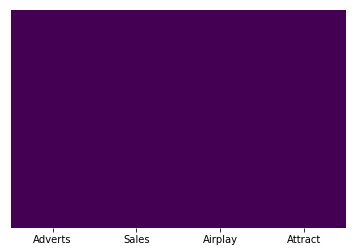

In [29]:
# show missing values (missing values - if present - will be displayed in yellow )
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis');

In [30]:
print(df.isnull().sum())

Adverts    0
Sales      0
Airplay    0
Attract    0
dtype: int64


---

### Task 1.3

In [31]:
print('Descriptive Statistics for Sales:')
print(f'Mode: {(df["Sales"].mode())}')
print(f'Mean: {round(df["Sales"].mean(),2)}')
print(f'Median: {df["Sales"].median()}')
print(f'Range: {df["Sales"].max() - df["Sales"].min()}')
print(f'Standard Deviation: {round(df["Sales"].std(),2)}')

Descriptive Statistics for Sales:
Mode: 0    230
dtype: int64
Mean: 193.2
Median: 200.0
Range: 350
Standard Deviation: 80.7


In [32]:
# summary statistics for all numerical columns
round(df.describe(),2)

,Adverts,Sales,Airplay,Attract
count,200.00,200.0,200.00,200.00
mean,614.41,193.2,27.50,6.77
std,485.66,80.7,12.27,1.40
min,9.10,10.0,0.00,1.00
25%,215.92,137.5,19.75,6.00
50%,531.92,200.0,28.00,7.00
75%,911.23,250.0,36.00,8.00
max,2271.86,360.0,63.00,10.00


---

### Task 1.4

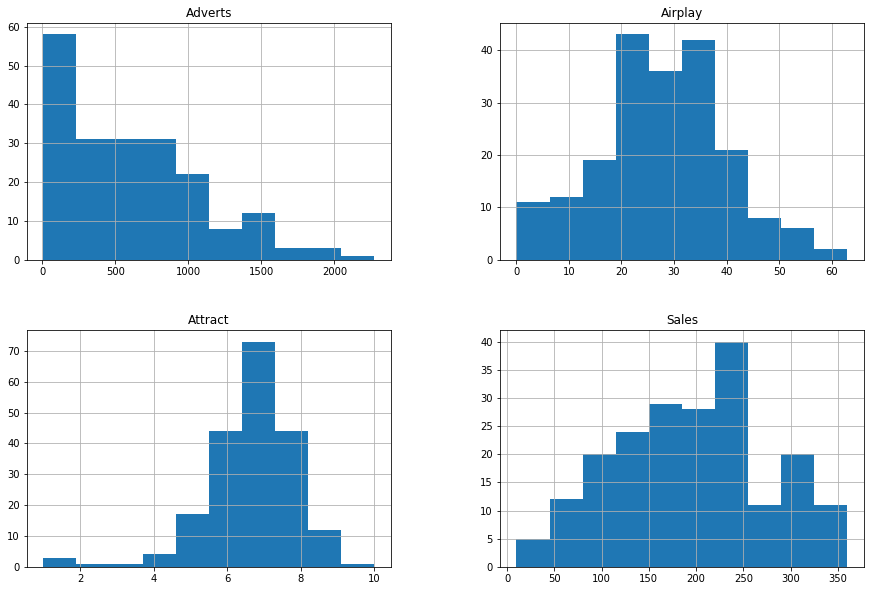

In [33]:
# histogram with pandas
df.hist(figsize=(15, 10));

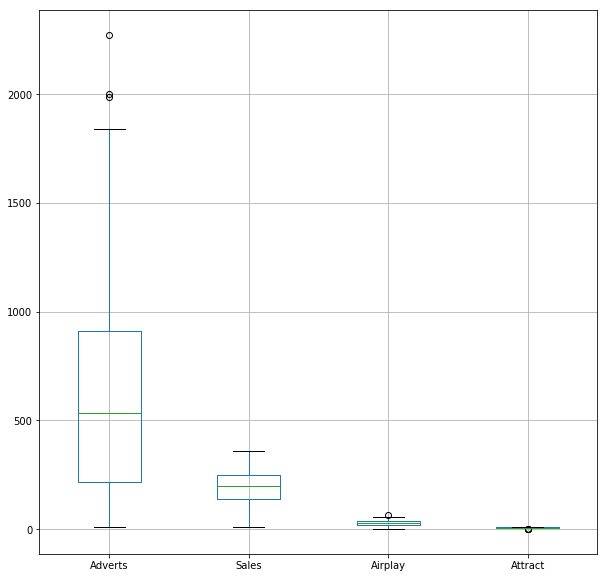

In [34]:
df.boxplot(figsize=(10, 10));

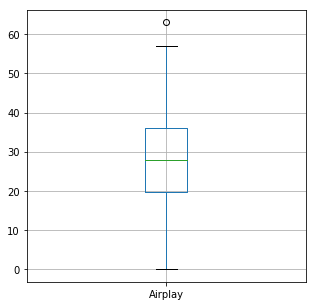

In [40]:
df.boxplot('Airplay', figsize=(5, 5));

---

### Task 1.6

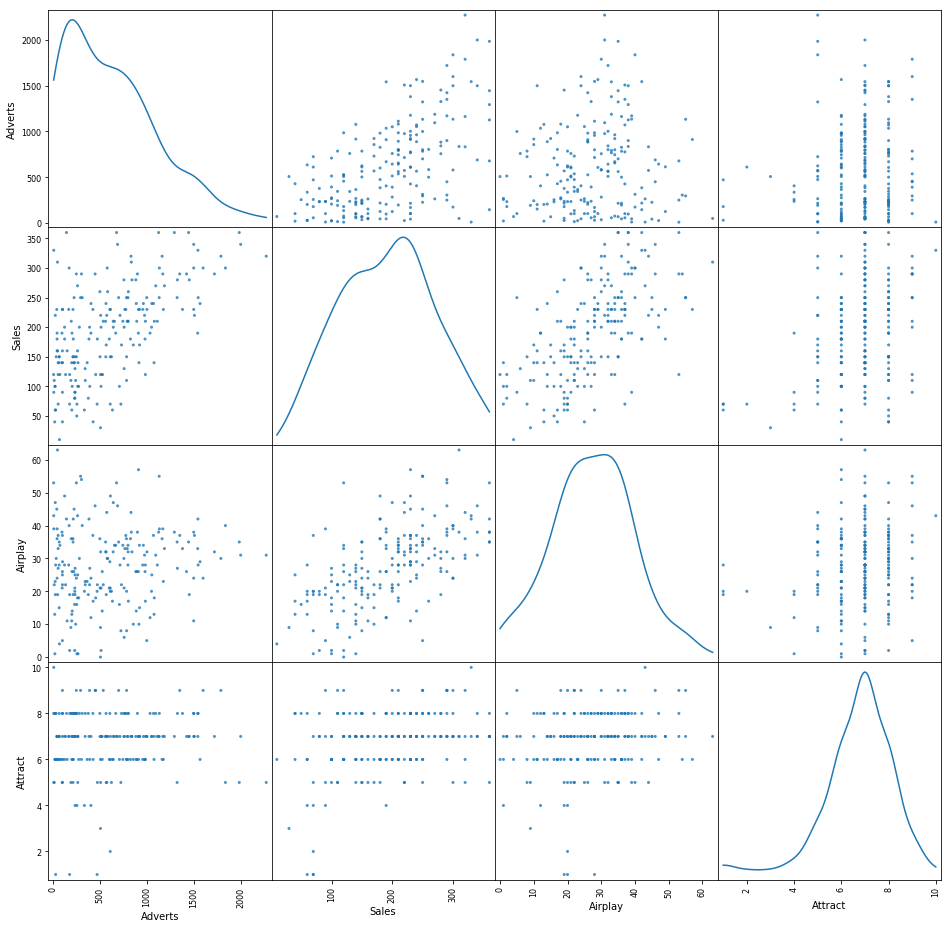

In [41]:
# plot all variables in a scatter matrix
pd.plotting.scatter_matrix(df, alpha=0.8, figsize=(16, 16), diagonal='kde');

---

### Task 1.6

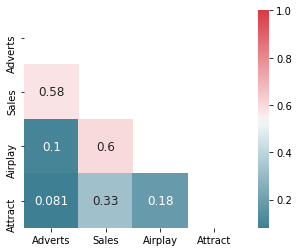

In [44]:
# Inspect relationship between variables (correlation)
# Calculate correlation using the default method ( "pearson")
corr = df.corr()
# optimize aesthetics: generate mask for removing duplicate / unnecessary info
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Generate a custom diverging colormap as indicator for correlations:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Plot
sns.heatmap(corr, mask=mask, cmap=cmap, annot=True,  square=True, annot_kws={"size": 12});

---

# Task 2

### Task 2.1

In [53]:
# fit linear model with statsmodels.formula.api
lm = smf.ols(formula ='Sales ~ Adverts', data=df).fit()
# Result
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.331
Method:                 Least Squares   F-statistic:                     99.59
Date:                Tue, 18 Dec 2018   Prob (F-statistic):           2.94e-19
Time:                        11:31:13   Log-Likelihood:                -1120.7
No. Observations:                 200   AIC:                             2245.
Df Residuals:                     198   BIC:                             2252.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    134.1399      7.537     17.799      0.000     119.278     149.002
Adverts        0.0961      0.010      9.979      0.000       0.077       0.115
==============================================================================
Omnibus:                        4.961   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.084   Jarque-Bera (JB):                4.556
Skew:                           0.339   Prob(JB):                        0.102
Kurtosis:                       3.294   Cond. No.                     1.26e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.26e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [54]:
# fit linear model with statsmodels.formula.api
lm = smf.ols(formula ='Sales ~ Adverts + Airplay + Attract', data=df).fit()
# Result
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     129.5
Date:                Tue, 18 Dec 2018   Prob (F-statistic):           2.88e-46
Time:                        11:37:13   Log-Likelihood:                -1052.2
No. Observations:                 200   AIC:                             2112.
Df Residuals:                     196   BIC:                             2126.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -26.6130     17.350     -1.534      0.127     -60.830       7.604
Adverts        0.0849      0.007     12.261      0.000       0.071       0.099
Airplay        3.3674      0.278     12.123      0.000       2.820       3.915
Attract       11.0863      2.438      4.548      0.000       6.279      15.894
==============================================================================
Omnibus:                        0.610   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.737   Jarque-Bera (JB):                0.351
Skew:                          -0.073   Prob(JB):                        0.839
Kurtosis:                       3.144   Cond. No.                     4.11e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.11e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

/Users/jankirenz/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


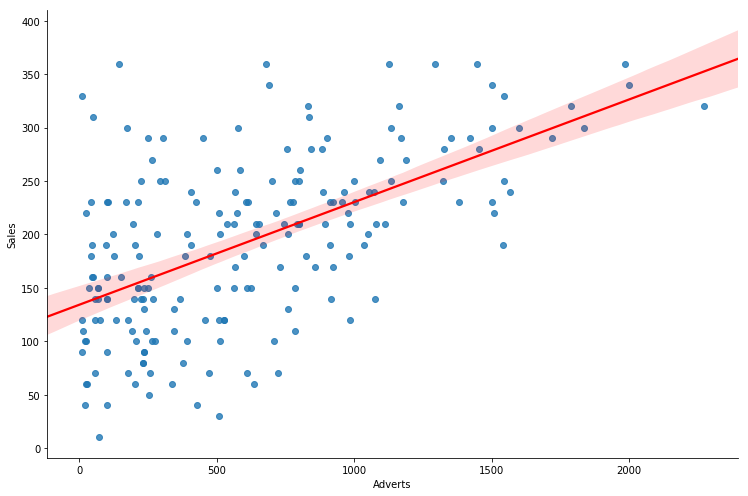

In [56]:
sns.lmplot(x='Adverts', y='Sales', data=df, order=1, line_kws={'color':'red'}, height=7, aspect=1.5, ci=95);

### Multiple linear regression

In [23]:
# fit linear model with statsmodels.formula.api (with R-style formulas) 
lm = smf.ols(formula ='Sales ~ Adverts + Airplay', data=df).fit()
# Result
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.626
Method:                 Least Squares   F-statistic:                     167.2
Date:                Wed, 03 Oct 2018   Prob (F-statistic):           3.55e-43
Time:                        13:58:38   Log-Likelihood:                -1062.2
No. Observations:                 200   AIC:                             2130.
Df Residuals:                     197   BIC:                             2140.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.1238      9.331      4.407      0.000      22.722      59.525
Adverts        0.0869      0.007     11.991      0.000       0.073       0.101
Airplay        3.5888      0.287     12.513      0.000       3.023       4.154
==============================================================================
Omnibus:                        0.145   Durbin-Watson:                   2.055
Prob(Omnibus):                  0.930   Jarque-Bera (JB):                0.049
Skew:                          -0.036   Prob(JB):                        0.976
Kurtosis:                       3.024   Cond. No.                     2.09e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
---- ENDE -----

In [ ]:
# calculate the sum of the errors 
df.error.sum()

In [ ]:
# create a scatterplot (plt)
plt = sns.scatterplot(x="id", y="height",data=df,);
plt.set(xlabel='ID', ylabel='Height in cm', title='Error of th model');
plt.plot([0, 20], [165, 165], linewidth=2, color='r');
plt.text(1, 165.2,'mean = 165', rotation=0, color='r');

### Sum of squared errors

Errors cancel out because some are positive and others negative. Therefore, we square each deviation. If we add these squared deviations we get the **Sum of Squared Errors (SS)**.

$ SS = \sum_{i=1}^n (outcome_i - model_i)^2$ 

In [ ]:
# calculate sum of squared error and assign it to dataframe
df = df.assign(ss = (df['height'] - df['average'])**2)
df.head(5)

In [ ]:
# calculate the sum of squared errors (ss) 
sum_of_squares = df.ss.sum()
print(sum_of_squares)

### Mean squared error, variance and standard deviation

Although the sum of squared errors (SS) is a good measure of the accuracy of our model, it depends upon the quantity of data that has been collected – the more data points, the higher the SS. By using the average error, rather than the total, we can overcome this problem. This measure is called the "**Mean Squared Error (MSE)**". In the regression setting, it is
the most commonly-used measure to evaluate the performance of a model. 

To compute the average error we divide the sum of squares by the number of values that we used to compute that total. We again come back to the problem that we’re usually interested in the error in the model in the **population** (not the **sample**). To estimate the mean error in the population we need to divide not by the number of scores contributing to the total, but by the **degrees of freedom (df)**, which is the number of scores used to compute the total adjusted for the fact that we’re trying to estimate the population value. Important note: you may encounter different formulas for calculating the mse. Some only devide by the number of observations and not the df.

Mean squared error =  $$\frac {SS}{df} = \frac {\sum_{i=1}^n (outcome_i - model_i)^2}{N-1}$$

The **mean squared error** is also known as the **variance**. Furthermore, the **standard deviation** is the square root of the variance.

$$Variance = s^2 = \frac {SS}{df} = \frac {\sum_{i=1}^n (outcome_i - model_i)^2}{N-1}$$

Standard Deviation = $$\sqrt{s^2} = \sqrt{\frac{\sum\limits_{i=1}^{n} \left(x_{i} - \bar{x}\right)^{2}} {n-1}}$$

which equals:

$$ s =  \frac {\sum_{i=1}^n (outcome_i - model_i)}{N-1}$$

A small standard deviation represented a scenario in which most data points were close to the mean, whereas a large standard deviation represented a situation in which data points were widely spread from the mean. 

In [ ]:
# calculate mean squared error (mse)
# Number of obeservations (lenght of DataFrame)
N = len(df["id"])
# calculate mse
mse = (sum_of_squares/(N-1))
print(mse)
# assign se to df
df = df.assign(mse=mse)

Mean squared error =  $\frac {SS}{df} = \frac {\sum_{i=1}^n (outcome_i - model_i)^2}{N-1} = \frac {\sum_{i=1}^nx_i-\bar{x}^2}{N-1} = \frac {42}{19} = 2.210$

In our example, $N=20$ and therefore, the degrees of freedom are df = (20-1) = 19.

In [ ]:
# generate a variable called variance
variance = mse
# assign variance to df
df = df.assign(variance=variance)
# calculate the standard deviation
print(f'Standard deviation (function) = {round(df["height"].std(),2)}')
print(f'Standard deviation (root of the variance) = {round(np.sqrt(variance),2)}')

std = round(df["height"].std(),2)
# assign standard deviation (s) to df
df = df.assign(s=std)

### Standard error

We just learned that the **standard deviation** tells us about how well the mean represents the sample data. However, if we’re using the **sample mean** to estimate this parameter in the **population** (like we did), then we need to know how well it represents the value in the population, especially because samples from a population differ. 

Imagine that we were interested in the height of *all* adult women in germany (so adult women in germany are the population). We could take a sample from this population (like we did with our 20 women), and when we do we are taking one of many possible samples. If we were to take several samples from the same population, then each sample would have its own mean, and some of these sample means will be different. 

Imagine we could obtain the height of all adult women in germany and could compute the mean of their height (and obtain 168 cm). Then we would know, as an absolute fact, that the mean of the height is 168 cm (this is the population mean, µ, the parameter that we’re trying to estimate).

In reality, we don’t have access to the population, so we use a sample. In this sample we calculate the average height, known as the **sample mean**, and discover it is 168 cm; that is, adult women in germany are 168 cm tall, on average. Now we take a second sample and find that women in this sample are, on average, only 167 cm tall. In other words, the sample mean is different in the second sample than in the first. This difference illustrates **sampling variation**: that is, samples vary because they contain different members of the population; a sample that, by chance, includes relatively tall women will have a higher average than a sample that, by chance, includes some women who are relatively short.

Imagine that we now take a lot of samples (let's say 100). If we plotted the resulting sample means as a histogram, we would observe a symmetrical distribution known as a **sampling distribution**. 

A **sampling distribution** is the frequency distribution of sample means (or whatever parameter you’re trying to estimate) from the same population. You need to imagine that we’re taking hundreds or thousands of samples to construct a sampling distribution. 

The sampling distribution of the mean tells us about the behaviour of samples from the population, and you’ll notice that it is centred at around the same value as the mean of the population. Therefore, if we took the average of all sample means we’d get the value of the population mean. 

We can use the sampling distribution to tell us how *representative a sample* is of the population. Think back to the **standard deviation**. We used the standard deviation as a measure of how representative the mean was of the observed data. 

A small standard deviation represented a scenario in which most data points were close to the mean, whereas a large standard deviation represented a situation in which data points were widely spread from the mean. If our ‘observed data’ are sample means then the standard deviation of these sample means would similarly tell us how widely spread (i.e., how representative) sample means are around their average. Bearing in mind that the *average of the sample means* is the same as the *population mean*, the standard deviation of the sample means would therefore tell us how widely sample means are spread around the population mean: put another way, it tells us whether sample means are typically representative of the population mean.

The standard deviation of sample means is known as the **standard error of the mean (SE)** or standard error for short. Theoretically, the standard error could be calculated by taking the difference between each sample mean and the overall mean, squaring these differences, adding them up, and then dividing by the number of samples. Finally, the square root of this value would need to be taken to get the standard deviation of sample means: the standard error. In the real world, it would be to costly to collect hundreds of samples, and so we compute the standard error from a mathematical approximation. Statisticians have demonstrated something called the **central limit theorem**, which tells us that as samples get large (usually defined as greater than 30), the sampling distribution has a normal distribution with a mean equal to the population mean, and we can calculate the standard deviation as follows: 

$$\sigma_{\bar{X}} = \frac{s} {\sqrt{N}}$$

Hence, if our sample is large we can use the equation above to approximate the standard error (because it is the standard deviation of the sampling distribution).

Note: when the sample is relatively small (fewer than 30) the sampling distribution is not normal: it has a different shape, known as a **t-distribution**, which we’ll cover later.

In [ ]:
# calculate standard error (...we ignore the fact that our sample is small since n < 30) 
se = df['height'].sem()
print(se)
# assign se to df
df = df.assign(se=se)

In [ ]:
# alternative way to calculate standard error (se)
# calculate standard deviation (s)
s = df["height"].std()
# calculate se
se = (s/np.sqrt(N))
print(se)

**Summary**

  * The standard error of the mean is the standard deviation of sample means. 
  * As such, it is a measure of how representative of the population a sample mean is likely to be. 
  * A large standard error (relative to the sample mean) means that there is a lot of variability between the means of different samples and so the sample mean we have might not be representative of the population mean. 
  * A small standard error indicates that most sample means are similar to the population mean (i.e., our sample mean is likely to accurately reflect the population mean).

## Confidence interval

As a brief recap, we usually use a **sample value** as an estimate of a **parameter** (e.g., the mean) in the **population**. We’ve just seen that the **estimate of a parameter** (e.g., the mean) will differ across samples, and we can use the **standard error** to get some idea of the extent to which these estimates differ across samples. We can also use this information to calculate boundaries within which we believe the population value will fall. Such boundaries are called **confidence intervals**. 

For example, perhaps we might want to know how often, *in the long run*, an interval contains the true value of the parameter we’re trying to estimate (in this case, the mean). This is what a **confidence interval** does. Typically, we look at 95% confidence intervals, and sometimes 99% confidence intervals, but they all have a similar interpretation: they are limits constructed such that, for a certain percentage of samples (be that 95% or 99%), the true value of the population parameter falls within the limits. So, when you see a 95% confidence interval for a mean, think of it like this: 

  * if we’d collected 100 samples, and for each sample calculated the mean and a confidence interval for it, then for 95 of these samples, the confidence interval contains the value of the mean in the population, and in 5 of the samples the confidence interval does not contain the population mean. 
  
The trouble is, you do not know whether the confidence interval from a particular sample is one of the 95% that contain the true value or one of the 5% that do not.

Here is an example of a common wrong interpretation of confidence intervalls:


* **Wrong** interpretation: a 95% confidence interval has a 95% probability of containing the population parameter. 

It is a common mistake, but this is not true. The 95% reflects a *long-run probability*. It means that if you take repeated samples and construct confidence intervals, then 95% of them will contain the population value. That is not the same as a particular confidence interval for a specific sample having a 95% probability of containing the value. In fact, for a specific confidence interval, the probability that it contains the population value is either 0 (it does not contain it) or 1 (it does contain it). You have no way of knowing which it is.

To calculate the confidence interval, we need to know the limits within which 95% of sample means will fall. We know (in large samples) that the sampling distribution of means will be normal, and the **normal distribution** has been precisely defined such that it has a mean of 0 and a standard deviation of 1. We can use this information to compute the probability of a score occurring, or the limits between which a certain percentage of scores fall. We make use of the fact that 95% of **z-scores** fall between −1.96 and 1.96. This means that if our sample means were normally distributed with a mean of 0 and a standard error of 1, then the limits of our confidence interval would be −1.96 and +1.96. Luckily we know from the central limit theorem that in large samples (above about 30) the sampling distribution will be normally distributed. 

It’s a pity then that our mean and standard deviation are unlikely to be 0 and 1 – except it’s not, because we can convert scores so that they do have a mean of 0 and standard deviation of 1 (**z-scores**) using equation

$$z = \frac{X-\bar{X}}{s}$$

In [ ]:
# calculate z-scores
z = stats.zscore(df.height)
print(z)
# assign z-scores to df
df = df.assign(z = z)

In [ ]:
plt = sns.distplot(df.z);
# draw a vertical line
plt.axvline(1.96, 0, 1, linewidth=2, color='r');
# add text
plt.text(2.1, 0.3,'z = 1.96', rotation=90, color='r');
plt.axvline(-1.96, 0, 1, linewidth=2, color='r');
plt.text(-2.2, 0.3,'z = -1.96', rotation=90, color='r');

If we know that our limits are −1.96 and 1.96 as z-scores, then to find out the corresponding scores in our raw data we can replace z in the equation (because there are two values, we get two equations):

$$1.96 = \frac{X-\bar{X}}{s}$$

and  

$$-1.96 = \frac{X-\bar{X}}{s}$$

We rearrange these equations to discover the value of X:

$$1.96 \times s = X - \bar{X}$$  

$$(1.96 \times s) + \bar{X} = X$$  

and

$$-1.96 \times s = X - \bar{X}$$

$$(-1.96 \times s) + \bar{X} = X$$ 

Therefore, the confidence interval can easily be calculated once the **standard deviation** (s in the equation) and **mean** ($\bar{x}$ in the equation) are known. 

However, we use the **standard error** and not the standard deviation because we’re interested in the variability of sample means, not the variability in observations within the sample. 

The lower boundary of the confidence interval is, therefore, the mean minus 1.96 times the standard error, and the upper boundary is the mean plus 1.96 standard errors: 


lower boundary of confidence intervall = $\bar{X} - (1.96 \times SE)$

upper boundary of confidence intervall = $\bar{X} + (1.96 \times SE)$

As such, the mean is always in the centre of the confidence interval. We know that 95% of confidence intervals contain the population mean, so we can assume this confidence interval contains the true mean; therefore, if the interval is small,the sample mean must be very close to the true man. Conversely, if the confidenve interval is very wide then the sample mean could be very different from the true mean, indicating that it is a bad representation of the population.

In [ ]:
# lower boundary
lb = (df.height.mean() - (1.96*se))
# assign to df
df = df.assign(ci_lb = lb)
# upper boundary
up = (df.height.mean() + (1.96*se))
# assign to df
df = df.assign(ci_up = up)

In [ ]:
df.head(5)

In [ ]:
# draw limits of confidence intervall
plt = sns.distplot(df.height);
# draw a vertical line to mark the mean 
plt.axvline(165, 0, 1, linewidth=3, color='b');
# add text
plt.text(165.1, 0.1,'Mean = 165', rotation=90, color='b');
# draw a vertical line to mark the lower limit of the confidence intervall
plt.axvline(164.348388, 0, 1, linewidth=3, color='w');
# add text
plt.text(164, 0.15,'Lower limit = 164.34 ', rotation=90, color='w');
# draw a vertical line to mark the upper limit of the confidence intervall
plt.axvline(165.651612, 0, 1, linewidth=3, color='w');
plt.text(165.8, 0.15,'Upper limit = 165.65', rotation=90, color='w');

### Confidence intervals in small samples

The procedure we just used is fine when samples are large, because the central limit theorem tells us that the sampling distribution will be normal. However, for small samples, the sampling distribution is not normal – it has a t-distribution. The t-distribution is a family of probability distributions that change shape as the sample size gets bigger (when the sample is very big, it has the shape of a normal distribution). 

To construct a confidence interval in a small sample we use the same principle as before, but instead of using the value for z we use the value for t:

lower boundary of confidence intervall = $\bar{X} - (t_{n-1} \times SE)$

upper boundary of confidence intervall = $\bar{X} + (t_{n-1}  \times SE)$

The (n − 1) in the equations is the degrees of freedom and tells us which of the t-distributions to use. For a 95% confidence interval, we can calculate the value of t for a two-tailed test with probability of 0.05, for the appropriate degrees of freedom.

In [ ]:
# calculate t-statistic
# 95% confidence interval, two tailed test, 
# p<0.05 (we need to take 0.025 at each side), n=20, df=19
t = stats.t.ppf(1-0.025, 19)
print(t)
# lower boundary
lb_t = (df.height.mean() - (t*se))
# assign to df
df = df.assign(ci_lb_t = lb_t)
# upper boundary
up_t = (df.height.mean() + (t*se))
# assign to df
df = df.assign(ci_up_t = up_t)

In [ ]:
df.head(5)

In [ ]:
# draw limits of confidence intervall for t-statistic
plt = sns.distplot(df.height);
# draw a vertical line to mark the mean 
plt.axvline(165, 0, 1, linewidth=3, color='b');
# add text
plt.text(165.1, 0.1,'Mean = 165', rotation=90, color='b');
# draw a vertical line to mark the lower limit of the confidence intervall
plt.axvline(164.304164, 0, 1, linewidth=3, color='r');
# add text
plt.text(164, 0.15,'Lower limit = 164.30 ', rotation=90, color='r');
# draw a vertical line to mark the upper limit of the confidence intervall
plt.axvline(165.695836, 0, 1, linewidth=3, color='r');
plt.text(165.8, 0.15,'Upper limit = 165.69', rotation=90, color='r');

In [ ]:
# compare CI z-statistic with t-statistic
# draw limits of confidence intervall
plt = sns.distplot(df.height);
# draw a vertical line to mark the mean 
plt.axvline(165, 0, 1, linewidth=3, color='b');
# add text
# draw vertical lines to mark the lower/upper limit of the confidence intervall (z)
plt.axvline(164.348388, 0, 1, linewidth=3, color='w');
plt.axvline(165.651612, 0, 1, linewidth=3, color='w');
# draw vertical lines to mark the lower/upper limit of the confidence intervall (t)
plt.axvline(164.304164, 0, 1, linewidth=3, color='r');
plt.axvline(165.695836, 0, 1, linewidth=3, color='r');

**Visualize confidence intervals in plots**

We saw that confidence intervals provide us with information about a parameter, and, therefore, you often see them displayed on graphs.

The confidence interval is usually displayed using something called an **error bar**, which looks like the letter ‘I’. An error bar can represent the **standard deviation**, or the **standard error**, but more often than not it shows the **95% confidence interval** of the mean. So, often when you see a graph showing the mean, perhaps displayed as a bar or a symbol, it is accompanied by this I-shaped bar. 

In [ ]:
sns.barplot(y="height", data=df);

---
---

### Save data

In [ ]:
# save as csv-file
#PATH = '/Users/jankirenz/Dropbox/Data/' 
#df.to_csv(PATH + 'df_height.csv')

### Load data

In [ ]:
# Load the csv data files into pandas dataframes
#PATH = '/Users/jankirenz/Dropbox/Data/' 
#df = pd.read_csv(PATH + 'df_height.csv')